# Classification and Regression Trees

## Decision tree for classification

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import utils

wbc = pd.read_csv("Downloads/wbc.csv")
response = 'diagnosis'
expla = ['radius_mean','concave points_mean']

X = wbc.loc[:,expla]
y = wbc['diagnosis']
y = y.map({'M':1,'B':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [93]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

SEED = 1

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])



[0 1 1 0 0]


## Evaluate the classification tree

In [3]:
from sklearn.metrics import accuracy_score

# Compute test set accuracy  
accu = accuracy_score(y_pred, y_test)
print("Accuracy of model: {:.2f}".format(accu))

Accuracy of model: 0.89


## Logistic regression vs classification tree

In [4]:
from mlxtend.plotting import plot_decision_regions

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1,2, figsize = [10.0,5.0], sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend=2, ax =ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i ==0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
        plt.tight_layout
        
    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


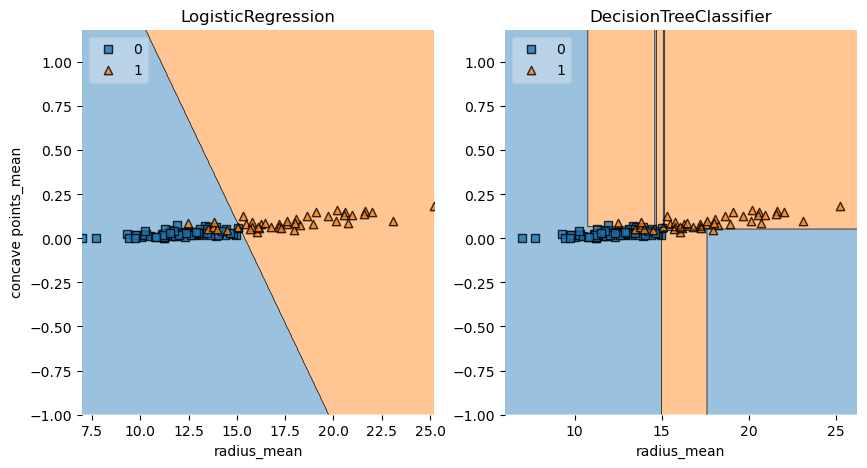

In [5]:
from sklearn.linear_model import LogisticRegression 

# Instatiate logreg
logreg = LogisticRegression(random_state =1, solver = 'liblinear')

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg,dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

# Classification tree Learning
### Using entropy as a criterion

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth = 8, criterion = 'entropy', random_state =1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

## Entropy vs Gini index

In [7]:
dt_gini = DecisionTreeClassifier(max_depth = 8, criterion = 'gini', random_state = 1)
dt_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [8]:
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_pred, y_test)
accuracy_gini = accuracy_score(y_pred_gini, y_test)

# Print accuracy_entropy
print("Accuracy achieved by using entropy: ", accuracy_entropy)

# Print accuracy_gini
print("Accuracy achieved by using gini: ", accuracy_gini)

Accuracy achieved by using entropy:  0.9035087719298246
Accuracy achieved by using gini:  0.9035087719298246


## Decision tree for regression

In [9]:
auto= pd.read_csv('Downloads/auto.csv')
auto_origin = pd.get_dummies(auto.origin)
auto = pd.concat([auto, auto_origin], axis = 1).drop('origin', axis = 1)
auto.columns = ['mpg', 'displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia', 'origin_Europe', 'origin_US']
auto.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [10]:
X = auto[['displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia',
       'origin_Europe', 'origin_US']]
y = auto['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)
print(X_test)
print(y_test)

     displ   hp  weight  accel  size  origin_Asia  origin_Europe  origin_US
81    79.0   67    2000   16.0  10.0            0              1          0
165  110.0   87    2672   17.5  10.0            0              1          0
351  225.0  100    3630   17.7  15.0            0              0          1
119  302.0  139    3570   12.8  20.0            0              0          1
379  318.0  150    3755   14.0  20.0            0              0          1
..     ...  ...     ...    ...   ...          ...            ...        ...
23   383.0  170    3563   10.0  20.0            0              0          1
293  155.0  107    2472   14.0  15.0            0              0          1
13   351.0  148    4657   13.5  20.0            0              0          1
90    98.0   60    2164   22.1  10.0            0              0          1
61   250.0   88    3302   15.5  15.0            0              0          1

[79 rows x 8 columns]
81     31.0
165    25.0
351    19.0
119    20.2
379    13.0
     

In [11]:
from sklearn.tree import DecisionTreeRegressor
# Instantiate dt
dt = DecisionTreeRegressor(max_depth = 8, min_samples_leaf = 0.13, random_state =3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

## Evaluate the regression tree

In [12]:
from sklearn.metrics import mean_squared_error

y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = mean_squared_error(y_pred, y_test)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

print('Test set RMSE score. {:.2f}'.format(rmse_dt))

Test set RMSE score. 4.27


## Linear regression vs regression tree

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)


LinearRegression()

In [14]:
# Predict test set labels
y_pred_lr = lr.predict(X_test)

# Compute mse_dt
lr_mse = mean_squared_error(y_pred_lr, y_test)

# Compute rmse_dt
lr_rmse = lr_mse ** (1/2)

print('Test set RMSE score. {:.2f}'.format(lr_rmse))
print('Test set RMSE score. {:.2f}'.format(rmse_dt))

Test set RMSE score. 3.98
Test set RMSE score. 4.27


# The Bias-Variance Tradeoff
## Generalization Error

In [15]:
# Instantiate a DecisionTreeRegressor dt
dtr = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 0.26, random_state = 1)

## Evaluation with Cross- Validation

In [16]:
from sklearn.model_selection import cross_val_score

# valuate the list of MSE ontained by 10-fold CV
# Set n_jobs to -1 in order to exploit all CPU cores in computation

MSE_cv_scores = - cross_val_score(dtr, X_train, y_train, cv=10, scoring = 'neg_mean_squared_error', n_jobs =-1)

# Compute the 10-folds CV RMSE
RMSE = (MSE_cv_scores.mean() ** (1/2))

print(format(RMSE))

5.03675425396745


## Evaluate the training error

In [17]:
from sklearn.metrics import mean_squared_error as mse

# Fit dt to the training set
dtr.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dtr.predict(X_train)


# Evaluate the training set RMSE of dt
RMSE_train = (mse(y_train, y_pred_train)) ** (1/2)

#Print RMSE_train
print("Train RMSE: {:.2f}".format(RMSE_train))

Train RMSE: 5.11


In [18]:
## Notice how the training error is roughly equal to the 10-folds CV error you obtained in the previous exercise.

## dt suffers from high bias because RMSE_CV RMSE_train and both scores are greater than baseline_RMSE.

### Define the ensemble

In [19]:
indian = pd.read_csv('Downloads/indian_liver_patient_preprocessed.csv',index_col= 0)
indian.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [20]:
X = indian.drop('Liver_disease', axis =1)
y = indian['Liver_disease']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, test_size =0.3)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

# Set seed for reproducibility
SEED = 1

## Instantiate lr
lr = LogisticRegression(random_state=SEED)

## Instantiate tree
tree = DecisionTreeClassifier(min_samples_leaf = 0.13, random_state = SEED)

## Instantiate knn
knn = KNN(n_neighbors = 27)

# Define the list classifiers
classifiers = [('Logistic Regression', lr),
               ('K Nearest Neighbors', knn),
               ('Decision Tree Classifier', tree)]

print(classifiers)

[('Logistic Regression', LogisticRegression(random_state=1)), ('K Nearest Neighbors', KNeighborsClassifier(n_neighbors=27)), ('Decision Tree Classifier', DecisionTreeClassifier(min_samples_leaf=0.13, random_state=1))]


In [22]:
from sklearn.metrics import accuracy_score
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred =  clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
   
    print('{:s} : {:.3f}'.format(clf_name, accuracy))
    
print('\nLogistic Regression has the highest accuracy')  

Logistic Regression : 0.759
K Nearest Neighbors : 0.701
Decision Tree Classifier : 0.730

Logistic Regression has the highest accuracy


## Better performance with a Voting Classifier

In [23]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators = classifiers)

# Fit vc to the training set
vc.fit(X_train,y_train)

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print('Voting Classifier :{:.3f}'.format(accuracy))

print('\nThe voting classifier achieves a test set accuracy of 77.0%.\
\nThis value is greater than that achieved by LogisticRegression')

Voting Classifier :0.770

The voting classifier achieves a test set accuracy of 77.0%.
This value is greater than that achieved by LogisticRegression


## Bagging and Random Forests

In [24]:
## Define the bagging classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state =1)

# Instantiate bc
bc = BaggingClassifier(base_estimator =dt, n_estimators=50, random_state =1)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict on test data
y_predb = bc.predict(X_test)

# Evaluate acc_test
accuracy = accuracy_score(y_predb,y_test)

print('Test set accuracy of bc: {:.2f}'.format(accuracy))

print('\nA single tree dt would have achieved an accuracy of 69% which is 4% lower than Classification Tree\'s accuracy!')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test set accuracy of bc: 0.70

A single tree dt would have achieved an accuracy of 69% which is 4% lower than Classification Tree's accuracy!


# Out of Bag Evaluation (OOB are the obs left after a bootstrap selects its own observations using training data)
### Prepare the ground

In [27]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf =8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(estimator = dt, n_estimators = 50, oob_score =True, random_state= 1)


## OOB Score vs Test Set Score

In [28]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
accuracy = accuracy_score(y_pred, y_test)

# Evaluate OOB accuracy
oob_acc = bc.oob_score_

# Print acc_test and acc_oob
print("Test set accuracy: {:.3f}, OOB_score : {:.3f}".format(accuracy, oob_acc))

Test set accuracy: 0.707, OOB_score : 0.677


# Random Forest

## Train an RF regressor

In [63]:
bike = pd.read_csv('Downloads/bikes.csv')
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [82]:
X = bike.drop('cnt', axis='columns')
y = bike['cnt']


In [114]:
from sklearn.model_selection import train_test_split

X_train, y_train, x_test, y_test = train_test_split(X, y, test_size =0.5)

# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf (25 trees)
rf = RandomForestRegressor(n_estimators = 25, random_state =2)

# Fit rf to the training set 
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=2)

In [85]:
## Evaluate the RF regressor

from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(x_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred) ** 0.5

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[216. 328. 233. 263. 538.   5. 209. 464.   8. 130.  18. 255. 433. 269.
 271. 376. 407. 315. 371. 310. 516. 281.  45. 310. 369. 115. 499. 177.
 738. 102. 331.  72. 328. 116.  38. 421.   5. 100.   6.   4. 494. 273.
 482. 527. 356.   3. 180.   4. 276. 142. 502. 365. 102. 101.   4.  25.
 533. 188.   5. 419.  41. 363.  44. 131. 280.  15.  36. 224. 223. 122.
   8.   8.  52. 414. 376. 402. 536. 303.  43. 179. 389. 239.  48. 300.
 481. 274. 325. 270. 187. 302. 278. 581. 231. 395. 739. 327.  21.  73.
 640. 374. 632. 305. 193. 120.  71. 192. 287. 162. 237.  11. 365. 345.
   6. 189. 147.  16. 503. 435.   8. 241. 854. 421. 254. 398. 629. 531.
 202. 699. 162. 364. 498. 480. 414. 307. 573. 278.   2. 489. 231.   5.
 287.  25. 377. 690. 447.  16. 421. 200. 270. 230. 264.  59.   6. 818.
  49. 207. 741. 299.   6. 741. 173. 551. 201. 337. 229.  58.  16. 754.
 285. 201.  43. 341. 163.  65. 124.  63. 519. 492. 251. 897. 730. 523.
 469. 274. 253. 520. 308.   8.  58. 851. 683.  93.  35. 158.  35. 206.
 810. 181. 151. 430.  16.   5.  55.  43.  16.  86. 474.  42. 234.  11.
 233. 116. 354. 190. 139. 102. 483. 317. 285. 343. 123.  90. 300. 235.
 312. 268. 118. 281. 233. 444. 677. 674. 380. 517. 297. 412. 233. 174.
 596. 531. 183. 491. 194. 199. 487. 646. 274.  90. 343. 248.  67.  62.
 161. 941. 166.   9. 475.  42.  43. 292. 376. 145.  42.  10.  49.  30.
 691. 446.  32. 312. 192.  69. 814. 788.   9. 245. 627. 478. 211. 266.
 208. 605. 359. 119.  47.  33. 268. 342.  36. 366. 499. 261. 493.  16.
  17. 862. 270. 278. 631. 465. 232. 495. 845. 214. 121. 386. 284. 277.
 360. 913. 250.  20. 244. 275.  16. 202. 251. 543. 161. 342.  21.  16.
 272. 397. 254. 289. 152. 180. 614. 460.  64. 425. 303. 191. 220.  64.
 491. 224. 381. 283. 631.  12. 185.  40. 516. 110. 433.  21. 186. 317.
 162. 328. 141. 230.  18.  17.   7.  20. 351. 343. 205. 277. 492. 179.
 479. 462.  92. 338. 289. 229. 546.   4.  14.  47. 554. 291.  33. 331.
 550.   6. 178. 649.   6. 225.  64. 236. 196. 226. 314. 436.   3. 505.
 401. 257. 391. 794.  36. 707. 358. 450.  41. 472.  90. 515. 577. 505.
  37.  10.  11. 337. 418. 396. 156. 286. 260.  93. 271. 526. 338. 244.
  71.  92. 434. 305. 300. 222. 148. 367. 489.   4.   5.  19. 354.  38.
 872.   6.  48.  15. 217. 489. 241. 236.  29. 460.  26. 299. 584.   4.
  38.  37. 623.  46. 328. 382. 306. 783. 310. 457. 234. 455.  50. 140.
 282. 240.  14.  10.  26. 276. 702. 526. 112. 229.  60. 291.  37. 168.
 114.  60.  42. 439. 292. 436. 233. 844. 488. 186. 276.   6. 309. 582.
 360. 730.  40. 212. 457. 193. 151. 314.  17. 379.  76. 279.  12. 382.
 379. 849. 522. 126. 585.   6. 872. 265. 242. 389. 288.  55. 628.   7.
 760. 458. 698. 299.   8. 260. 199. 250. 482.  47. 145.  28. 377. 421.
 272.  34. 473. 368.  19. 480. 276. 640. 380. 254. 410. 108. 413.  11.
 487. 269.  40. 607. 261.  55. 294. 298. 751. 231. 870. 476.  11. 258.
 671. 847.  17.   8. 332. 214. 812. 665.  14. 153. 292.  17. 420.   5.
 513. 342. 226. 253. 103.   9.  46.   9. 492. 260. 320. 276. 251. 276.
 652. 560. 281. 356. 149.  39. 381.  25. 378. 254. 693. 338. 512. 668.
 554.  26.   8. 476.   9. 159. 305. 858. 313. 133. 869. 113. 398. 403.
 402. 269.  40.  39. 152. 641. 244. 358. 351.  19. 536. 263. 499. 350.
 818. 285. 452. 492. 345.  23. 343. 345. 414. 214.  65. 436. 161. 177.
  10.  12. 285. 643. 201.  41. 635. 190. 323. 266. 655. 229. 222. 382.
 329.   8. 119. 370. 566.  47. 211. 812.   7. 319. 235. 178. 300. 187.
 713.  10. 449. 331. 607.  31. 213. 103. 235.   9.  88. 521.  36. 319.
 343. 454.  17. 827.  47. 509. 220. 610. 514. 236.  34. 527.   6. 513.
 221. 209.  56. 138. 401.   8. 504. 722. 811. 178. 864. 313. 316. 378.
  37. 280. 256. 341. 208.   2.   3. 436. 336. 208.  68. 130.   5.  37.
  87. 425.  31. 522. 649. 336. 812. 491. 323. 175. 668. 389. 151. 513.
 237. 191.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

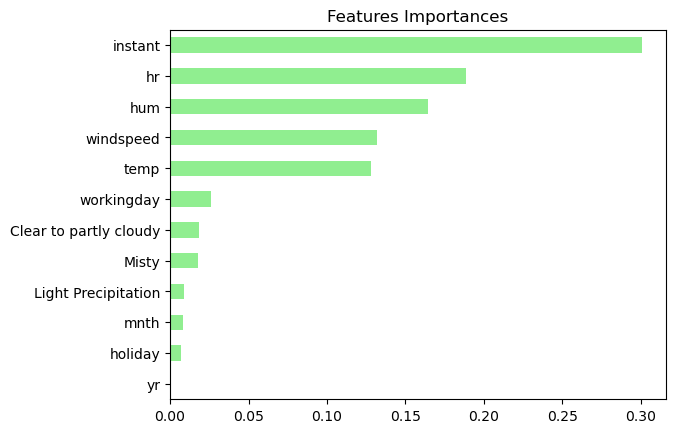

In [91]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index=X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.savefig('feature_importances.png')

# Boosting
## Adaboost

### Define the AdaBoost classifier

In [95]:
indian = pd.read_csv('Downloads/indian_liver_patient_preprocessed.csv', index_col=0)
indian.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [96]:
X = indian.drop('Liver_disease', axis =1)
y = indian['Liver_disease']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt  = DecisionTreeClassifier(max_depth=2, random_state = 1)

# Instantiate ada
ada = AdaBoostClassifier(estimator = dt, n_estimators =180, random_state =1)

In [103]:
# Fit ada to tnhe training set
ada.fit(X_train,y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]
y_pred_proba

array([0.48901627, 0.5590448 , 0.51707797, 0.42994478, 0.47294487,
       0.52390405, 0.4977801 , 0.71426639, 0.60535522, 0.54551346,
       0.61356881, 0.52234554, 0.49436412, 0.56096337, 0.48876787,
       0.58137168, 0.5670077 , 0.49640955, 0.55722963, 0.63395285,
       0.57815588, 0.49130929, 0.50148427, 0.54642155, 0.48687814,
       0.52417399, 0.49801281, 0.48900684, 0.59689157, 0.71710233,
       0.49917737, 0.50321435, 0.49807572, 0.50702584, 0.58279077,
       0.67083166, 0.42130156, 0.53996567, 0.47944625, 0.50936082,
       0.60515964, 0.60248114, 0.54073324, 0.52618154, 0.63127795,
       0.56793422, 0.49008926, 0.5326606 , 0.6594514 , 0.53136549,
       0.58998121, 0.50283315, 0.48485671, 0.58922853, 0.6038184 ,
       0.50151438, 0.46064035, 0.67397592, 0.48135808, 0.58951314,
       0.53414645, 0.48020561, 0.50184047, 0.68999761, 0.51233887,
       0.57691073, 0.48775655, 0.53909971, 0.51568207, 0.52608948,
       0.64174218, 0.57510329, 0.49852862, 0.48756496, 0.46843

In [104]:
from sklearn.metrics import roc_auc_score
# Evaluate test-set roc_auc_score
accuracy = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC score is :{:.2f}".format(accuracy))

ROC AUC score is :0.62


# Gradient Boosting (GB)
## Define the GB regressor

In [105]:
bike = pd.read_csv('Downloads/bikes.csv')
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [106]:
X = bike.drop('cnt', axis='columns')
y = bike['cnt']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [119]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=2)

In [120]:
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

In [122]:
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
MSE = MSE(y_test, y_pred)

## Compute RMSE
RMSE = MSE ** (1/2)

print('RMSE score is :{:.2f}'.format(RMSE))

RMSE score is :55.19


# Stochastic Gradient Boosting (SGB)
### Regression with SGB

In [125]:
from sklearn.ensemble import GradientBoostingRegressor

sgbr = GradientBoostingRegressor(max_depth =4, n_estimators = 200, subsample =0.9, max_features =0.75, random_state =2)

# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

## Evaluate the SGB regressor

from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
MSE = MSE(y_pred, y_test)

# Compute test set RMSE
RMSE = MSE ** 0.5

print('RMSE score is :{:.2f}'.format(RMSE))

RMSE score is :56.38


# Model Tuning
## Tuning a CART's Hyperparameters

In [126]:
## Tree hyperparameters

indian = pd.read_csv('Downloads/indian_liver_patient_preprocessed.csv', index_col=0)
indian.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [155]:
X = indian.drop('Liver_disease', axis =1)
y = indian['Liver_disease']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)

In [156]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt
dt  = DecisionTreeClassifier()

dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [157]:
#set the tree's hyperparameter grid
# Define params_dt
params_dt = {'max_depth': [2,3,4],
            'min_samples_leaf':[0.12, 0.14, 0.16, 0.18]}

# performing the grid search.
## Import GridSearchCVa
from sklearn.model_selection import GridSearchCV

## Instantiate grid_dt
grid_dt = GridSearchCV(estimator = dt, 
                      param_grid = params_dt,
                      scoring = 'roc_auc',
                      cv =5, 
                      n_jobs =-1)

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
             scoring='roc_auc')

In [158]:
#compute the test set ROC AUC score

from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

print('Best Estimator:/n', best_model)

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Best Estimator:/n DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.14)


ValueError: Found input variables with inconsistent numbers of samples: [348, 1]

# Tuning a RF's Hyperparameters
## Random forests hyperparameters

In [159]:
bike = pd.read_csv('Downloads/bikes.csv')
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [160]:
X = bike.drop('cnt', axis='columns')
y = bike['cnt']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [163]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor()

## get parameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [166]:
# Define the dicrionary 'params_rf'
params_rf = {'max_features': ['log2','auto','sqrt'],
             'n_estimators': [2,10,30], 
              'min_samples_leaf': [100,350,500]}

# Import GridSearchCV
#from sklearn.model_selection import GridSearchCV
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator =rf,
                      param_grid =params_rf,
                      scoring = 'neg_mean_squared_error',
                      cv =3, verbose= 1, n_jobs=-1)

# Fit with train set
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [100, 350, 500],
                         'n_estimators': [2, 10, 30]},
             scoring='neg_mean_squared_error', verbose=1)

In [169]:
from sklearn.metrics import mean_squared_error

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute mse_test
mse_test = mean_squared_error(y_pred, y_test)

# Compute rmse_test
rmse_test = mse_test ** (0.5)

print('RMSE score is :{:.3f}'.format(rmse_test))

RMSE score is :129.148
